## Install packages

In [ ]:
# google colab only, install ocean-data-parser
%pip install git+https://github.com/cioos-siooc/ocean-data-parser.git@development

In [1]:
from ocean_data_parser.parsers.dfo.nafc import pfile
import requests
import matplotlib.pyplot as plt

## Download examples files

In [2]:
# Download example p-file from github tests
def download_file_from_github(raw_url):
    """Download a github raw file localy"""
    odf_file_path = raw_url.split("/")[-1]
    response = requests.get(raw_url)
    with open(odf_file_path, "w") as f:
        f.write(response.text)
    return odf_file_path


nafc_pfile = "https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/development/tests/parsers_test_files/dfo/nafc/pfile/ctd/56001001.p2022"
pfile_name = download_file_from_github(nafc_pfile)

## Load NAFC p file

In [3]:
# Read p-file
ds = pfile(pfile_name)
ds

<xarray.Dataset>
Dimensions:    (index: 2214)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 2208 2209 2210 2211 2212 2213
    time       datetime64[ns] 2022-04-10T14:06:00
    latitude   float64 47.55
    longitude  float64 -51.41
Data variables: (12/15)
    scan       (index) int64 2 5 8 11 14 17 ... 10444 10447 10450 10453 10458
    PRESPR01   (index) float64 5.829 5.862 5.892 5.924 ... 171.6 171.7 171.7
    TEMPS901   (index) float64 0.5384 0.5385 0.5393 ... 0.4747 0.4747 0.4747
    CNDCST01   (index) float64 2.714 2.714 2.714 2.715 ... 2.806 2.806 2.806
    PSALST01   (index) float64 31.92 31.92 31.92 31.92 ... 33.09 33.09 33.09
    SIGTEQST   (index) float64 25.6 25.6 25.6 25.6 ... 26.54 26.54 26.54 26.54
    ...         ...
    PHXXZZXX   (index) float64 8.343 8.341 8.341 8.343 ... 8.275 8.275 8.275
    OPTCPS01   (index) float64 96.65 96.66 96.65 96.65 ... 96.25 96.25 96.25
    ATTNZS01   (index) float64 0.1364 0.1361 0.1364 ... 0.1529 0.1529 0.1529
    CCOMD002   (index) float64 0.2455 0.2455 0.2455 ... 0.7799 0.7388 0.7388
    depth      (index) float64 5.78 5.813 5.843 5.874 ... 170.1 170.1 170.2
    DOXYZZ01   (index) float64 8.175 8.175 8.179 8.18 ... 6.996 6.996 6.997
Attributes: (12/64)
    platform:                      ship
    sdn_platform_urn:              SDN:C17::33AT
    platform_name:                 Atlantis
    platform_owner:                U.S. Navy
    platform_type:                 Research Vessel
    country_of_origin:             United States
    ...                            ...
    time:                          2022-04-10T14:06:00Z
    trip:                          1
    waves_height:                  1
    waves_period:                  8
    wind_dir:                      80
    wind_speed_knots:              2

## Show Profile

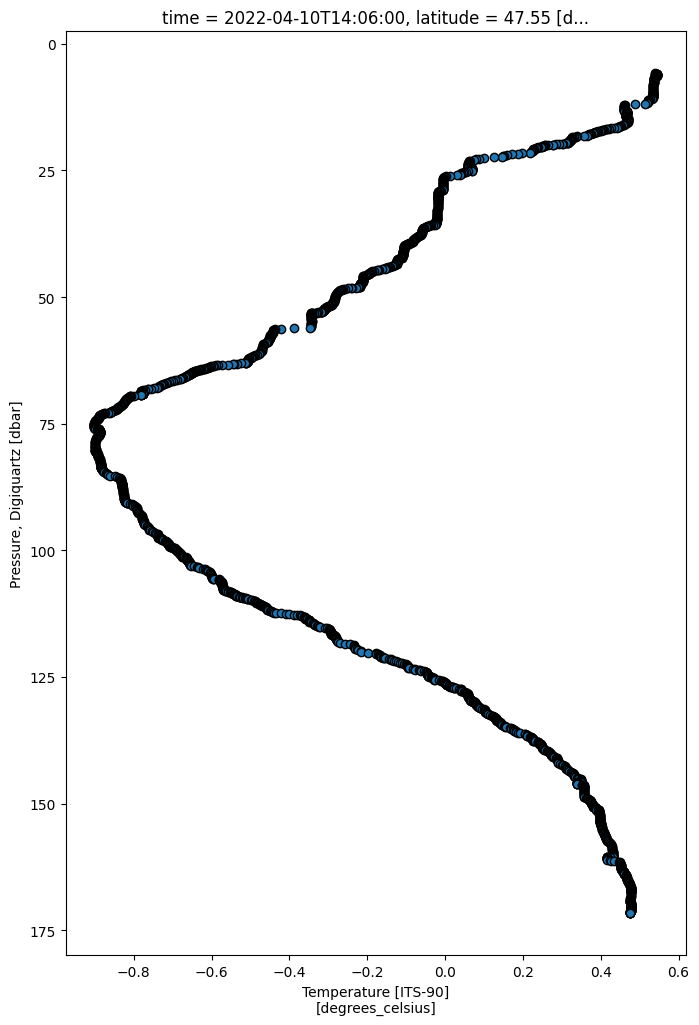

In [4]:
# Plots
fig = plt.figure(figsize=(8, 12))
ds.plot.scatter(x="TEMPS901", y="PRESPR01", yincrease=False, edgecolor="black")

## Save to NetCDF

In [5]:
# Save to NetCDF
ds.to_netcdf(pfile_name + ".nc")